<a href="https://colab.research.google.com/github/SSnehitha004/Sentimental_analysis_on_Womens_clothing/blob/main/Sentiment_Analysis_on_women_clothing_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import string
import nltk
import nltk.corpus
import sklearn

from matplotlib import rcParams
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import NaiveBayesClassifier
from nltk.corpus import wordnet
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk import pos_tag
from wordcloud import WordCloud
from nltk.classify.scikitlearn import SklearnClassifier



In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data/clothing_rev/Womens Clothing E-Commerce Reviews.csv')
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [ ]:
df.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [ ]:
# checking the shape of the dataset
df.shape

(23486, 11)

In [ ]:
# Counting the number of unique values in each column
df.nunique()

Unnamed: 0                 23486
Clothing ID                 1206
Age                           77
Title                      13993
Review Text                22634
Rating                         5
Recommended IND                2
Positive Feedback Count       82
Division Name                  3
Department Name                6
Class Name                    20
dtype: int64

In [ ]:
# Counting the number of null values in each column
df.isna().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.reset_index(drop=True, inplace=True)
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
1,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
2,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
3,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
4,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits


In [ ]:
df.isnull().sum()


Unnamed: 0                 0
Clothing ID                0
Age                        0
Title                      0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

In [ ]:
# dropping unnecessary culomns
df.drop(["Unnamed: 0", "Title", 'Clothing ID'], axis=1, inplace=True)

In [ ]:
df.head()

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
1,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
2,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
3,49,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
4,39,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits


In [ ]:
# removing spaces in the columns and replacing them with underscore
df.columns= df.columns.str.replace(" ", "_")

In [ ]:
reviews = []
for (index , category) in enumerate(df.Recommended_IND):
    reviews.append((df.Review_Text[index],category))
reviews[0:4]

[('I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c',
  0),
 ("I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",
  1),
 ('This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!',
  1),
 ('I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress 

In [ ]:
# create lemmatizer
lemmatizer = WordNetLemmatizer()

In [ ]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download the stopwords corpus
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Create a list of stopwords
stops= stopwords.words("english")
punctuations=list(string.punctuation)
stops=stops+punctuations
stops, string.punctuation

(['i',
  'me',
  'my',
  'myself',
  'we',
  'our',
  'ours',
  'ourselves',
  'you',
  "you're",
  "you've",
  "you'll",
  "you'd",
  'your',
  'yours',
  'yourself',
  'yourselves',
  'he',
  'him',
  'his',
  'himself',
  'she',
  "she's",
  'her',
  'hers',
  'herself',
  'it',
  "it's",
  'its',
  'itself',
  'they',
  'them',
  'their',
  'theirs',
  'themselves',
  'what',
  'which',
  'who',
  'whom',
  'this',
  'that',
  "that'll",
  'these',
  'those',
  'am',
  'is',
  'are',
  'was',
  'were',
  'be',
  'been',
  'being',
  'have',
  'has',
  'had',
  'having',
  'do',
  'does',
  'did',
  'doing',
  'a',
  'an',
  'the',
  'and',
  'but',
  'if',
  'or',
  'because',
  'as',
  'until',
  'while',
  'of',
  'at',
  'by',
  'for',
  'with',
  'about',
  'against',
  'between',
  'into',
  'through',
  'during',
  'before',
  'after',
  'above',
  'below',
  'to',
  'from',
  'up',
  'down',
  'in',
  'out',
  'on',
  'off',
  'over',
  'under',
  'again',
  'further',
  'th

In [ ]:
# business stopwords
business_stopwords= ["i'm","would", "look", "ordered", "wear", "fit", "one", "fits","bought", "looks", "also", "got", "think", "even",
                     "tried", "get", "could", "made","way","still", "runs","true" ,"right", "see","online","wearing", "however", "design","purchased","feel","go",
                     "enough","model","though","price","looked","person","better","first","going","try", "body" "bottom","time","many","looking","around","thought",
                     "make","wanted","saw","makes","went","find","found","buy","nan","i've", "since","seems","ok", "girl", "woman"]
stops= stops+business_stopwords
stops



['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
len(stops)

273

**Part-of-Speech Tagging**

In [ ]:
# function to get the simpler virsion of pos tag
def get_simple_pos(tag):
    if tag.startswith('N') or tag.startswith('J'):
        return wordnet.NOUN
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

**Lemmatization**

In [ ]:
def clean_review(words):
  output_words= []
  words_tokens= nltk.word_tokenize(words)
  for word in words_tokens :

    if word.lower() not in stops:
      pos = pos_tag([word])

      clean_word=(lemmatizer.lemmatize(word.lower(), pos=get_simple_pos(tag)) for word, tag in pos)
      output_words.append(', '.join(map(str,clean_word )))
  return output_words

In [ ]:
import nltk

# Download necessary NLTK data
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
clean_review("A girl was dancing in the rain")

['dance', 'rain']

In [ ]:
cleaned_reviews= [(clean_review(text),category )for text,category  in reviews]

In [ ]:
len(cleaned_reviews)

19662

In [ ]:
cleaned_reviews[0:5]

[(['high',
   'hope',
   'dress',
   'really',
   'work',
   'initially',
   'petite',
   'small',
   'usual',
   'size',
   'outrageously',
   'small',
   'small',
   'fact',
   'zip',
   'reorder',
   'petite',
   'medium',
   'ok.',
   'overall',
   'top',
   'half',
   'comfortable',
   'nicely',
   'bottom',
   'half',
   'tight',
   'layer',
   'several',
   'somewhat',
   'cheap',
   'net',
   'layer',
   'imo',
   'major',
   'flaw',
   'net',
   'layer',
   'sewn',
   'directly',
   'zipper',
   'c'],
  0),
 (['love',
   'love',
   'love',
   'jumpsuit',
   "'s",
   'fun',
   'flirty',
   'fabulous',
   'every',
   'nothing',
   'great',
   'compliment'],
  1),
 (['shirt',
   'flatter',
   'due',
   'adjustable',
   'front',
   'tie',
   'perfect',
   'length',
   'legging',
   'sleeveless',
   'pair',
   'well',
   'cardigan',
   'love',
   'shirt'],
  1),
 (['love',
   'tracy',
   'reese',
   'dress',
   'petite',
   '5',
   'foot',
   'tall',
   'usually',
   '0p',
   'bran

In [ ]:
#.75% traning = 14746 and 25% testing = 19662-14746 =4916
traning_words=cleaned_reviews[0:14746]
testing_words=cleaned_reviews[14746:]

In [ ]:
print(f"Training Data = {len(traning_words)}")
print(f"Testing Data = {len(testing_words)}")


Training Data = 14746
Testing Data = 4916


In [ ]:
# array contaning all words
words_list=[]
for word in traning_words:
        words_list+=word[0]

In [ ]:
# Total words in the traning data
len(words_list)

392719

In [ ]:
#frequency distribution for all words
freq= nltk.FreqDist(words_list)
common=freq.most_common()
features= [i[0]for i in common]

In [ ]:
print(len(common))
print(len(features))

12805
12805


In [ ]:
# Most common 5 words
common[0:5]

[('dress', 8091), ('size', 7083), ('love', 6701), ("n't", 5543), ('top', 5450)]

In [ ]:
# List of 5 features
features[0:5]

['dress', 'size', 'love', "n't", 'top']

<function matplotlib.pyplot.show(close=None, block=None)>

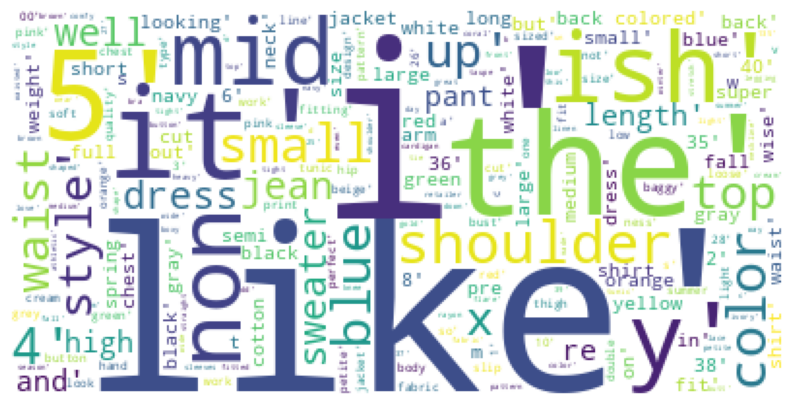

In [ ]:
# Visualizing the most repeated words (features)
wordCloud = WordCloud(background_color="white", max_words =3000).generate(str(features))

rcParams["figure.figsize"]= 10,20
plt.imshow(wordCloud)
plt.axis("off")
plt.show

In [ ]:
# function to return a set of features as true or false
def get_dict_for_feature(words):
  current_features={}
  words_set= set(words)
  for word in features:
    current_features[word] = word in words_set
  return current_features

In [ ]:
featuers_dic= get_dict_for_feature(traning_words[0][0])

In [ ]:
# Dictionary containing all the words with True classification if the word exists in each review else considered as false
featuers_dic

{'dress': True,
 'size': True,
 'love': False,
 "n't": False,
 'top': True,
 "'s": False,
 'like': False,
 'color': False,
 'great': False,
 "'m": False,
 '5': False,
 "''": False,
 'fabric': False,
 'small': True,
 'really': True,
 'perfect': False,
 'little': False,
 'flatter': False,
 'soft': False,
 'well': False,
 'back': False,
 'comfortable': True,
 'nice': False,
 'cute': False,
 'work': True,
 'bit': False,
 'sweater': False,
 'shirt': False,
 'beautiful': False,
 'material': False,
 'large': False,
 'much': False,
 'jean': False,
 'length': False,
 'petite': True,
 'long': False,
 'short': False,
 'waist': False,
 'medium': True,
 'quality': False,
 'retailer': False,
 'x': False,
 'pretty': False,
 'skirt': False,
 'pant': False,
 'store': False,
 'usually': False,
 'sleeve': False,
 '...': False,
 'style': False,
 'good': False,
 'cut': False,
 'big': False,
 'black': False,
 'return': False,
 'super': False,
 'picture': False,
 'say': False,
 'need': False,
 '4': False,
 '

In [ ]:
traning_words= [( get_dict_for_feature(words),category ) for words , category in traning_words]
testing_words = [( get_dict_for_feature(words),category ) for words , category in testing_words]

In [ ]:
traning_words[1]

({'dress': False,
  'size': False,
  'love': True,
  "n't": False,
  'top': False,
  "'s": True,
  'like': False,
  'color': False,
  'great': True,
  "'m": False,
  '5': False,
  "''": False,
  'fabric': False,
  'small': False,
  'really': False,
  'perfect': False,
  'little': False,
  'flatter': False,
  'soft': False,
  'well': False,
  'back': False,
  'comfortable': False,
  'nice': False,
  'cute': False,
  'work': False,
  'bit': False,
  'sweater': False,
  'shirt': False,
  'beautiful': False,
  'material': False,
  'large': False,
  'much': False,
  'jean': False,
  'length': False,
  'petite': False,
  'long': False,
  'short': False,
  'waist': False,
  'medium': False,
  'quality': False,
  'retailer': False,
  'x': False,
  'pretty': False,
  'skirt': False,
  'pant': False,
  'store': False,
  'usually': False,
  'sleeve': False,
  '...': False,
  'style': False,
  'good': False,
  'cut': False,
  'big': False,
  'black': False,
  'return': False,
  'super': False,
  '

**NaiveBayes classifier**

In [ ]:
NB_classifier= NaiveBayesClassifier.train(traning_words)
print("classifier accuracy percent:",(nltk.classify.accuracy(NB_classifier, traning_words))*100)

classifier accuracy percent: 91.89610741896107


In [ ]:
NB_classifier.show_most_informative_features(10)

Most Informative Features
               defective = True                0 : 1      =     26.3 : 1.0
            additionally = True                0 : 1      =     25.7 : 1.0
                 bizarre = True                0 : 1      =     22.7 : 1.0
                  poorly = True                0 : 1      =     21.8 : 1.0
                  nipple = True                0 : 1      =     16.6 : 1.0
                    blah = True                0 : 1      =     16.2 : 1.0
              unwearable = True                0 : 1      =     16.2 : 1.0
                   worst = True                0 : 1      =     16.1 : 1.0
                    asap = True                0 : 1      =     15.4 : 1.0
                   shame = True                0 : 1      =     15.3 : 1.0


In [ ]:
review_1 = "Good product,fit is good, had to alter the sleeve a little,nice classy look,worth the price."
review_2= "Worst Quality , Bad colour, Different from website , not upto the price"
review_3="It was of poor quality and not very accurate print"
review_4="It was really good, I really liked it a lot. Made out first easter special"

reviews = [review_1,review_2,review_3,review_4]


def test_custom_review(reviews_list, classifier):

    for idx,review in enumerate(reviews_list) :
        custom_tokens = clean_review(review)
        print(f"The clean review is : "  , str(custom_tokens).replace('[','').replace(']',''))
        classifiers=classifier.classify(dict([token, True] for token in custom_tokens))
        if (classifiers == 1):
            pred = "Positive"
        else:
            pred = "Negative"
        print(f"Review number {idx +1 }  seems to be {pred} \n")


In [ ]:
test_custom_review(reviews,NB_classifier)

The clean review is :  'good', 'product', 'good', 'alter', 'sleeve', 'little', 'nice', 'classy', 'worth'
Review number 1  seems to be Positive 

The clean review is :  'worst', 'quality', 'bad', 'colour', 'different', 'website', 'upto'
Review number 2  seems to be Negative 

The clean review is :  'poor', 'quality', 'accurate', 'print'
Review number 3  seems to be Negative 

The clean review is :  'really', 'good', 'really', 'like', 'lot', 'easter', 'special'
Review number 4  seems to be Positive 

